In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [49]:
file_path = "../../sorting_results_40000.csv";
data = pd.read_csv(file_path);
avg_data = data.groupby(["Scenario","Algorithm"], as_index=False)["Mean Duration (s)"].mean();

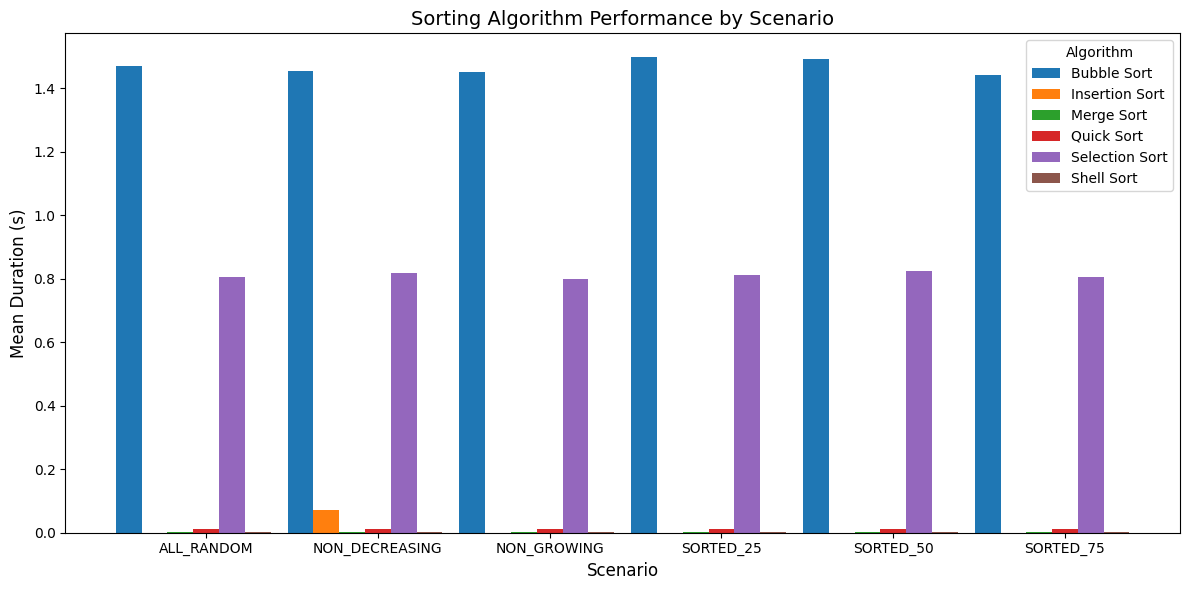

In [50]:
plt.figure(figsize=(12, 6));

algorithm = avg_data["Algorithm"].unique();
x_label = avg_data["Scenario"].unique();
bar_w = 0.15;
positions = range(len(x_label))

for i, alg in enumerate(algorithm):
    # Filtrar dados do algoritmo atual
    alg_data = avg_data[avg_data["Algorithm"] == alg]
    plt.bar(
        [p + i * bar_w for p in positions],
        alg_data["Mean Duration (s)"],
        width=bar_w,
        label=alg,
    )

# Adicionar labels e legendas
plt.xlabel("Scenario", fontsize=12)
plt.ylabel("Mean Duration (s)", fontsize=12)
plt.title("Sorting Algorithm Performance by Scenario", fontsize=14)
plt.xticks([p + (bar_w * (len(algorithm) / 2)) for p in positions], x_label)
plt.legend(title="Algorithm")
plt.tight_layout()

# Mostrar o gráfico
plt.show()

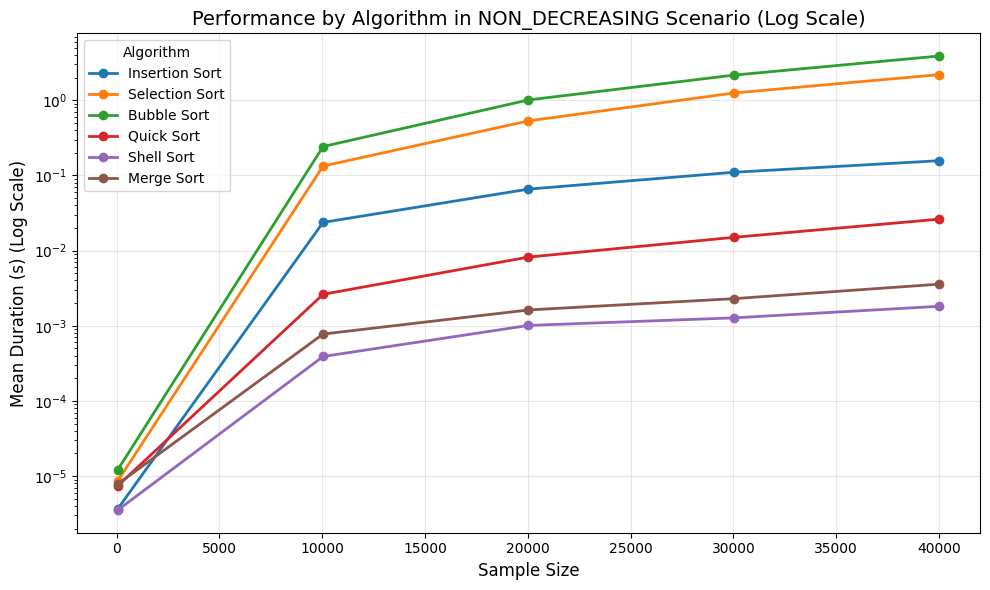

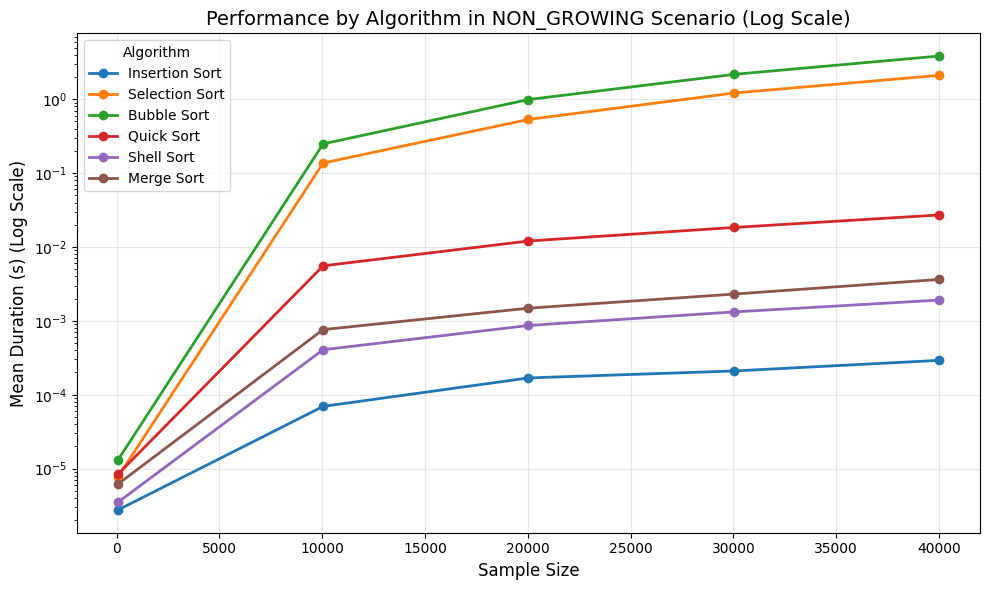

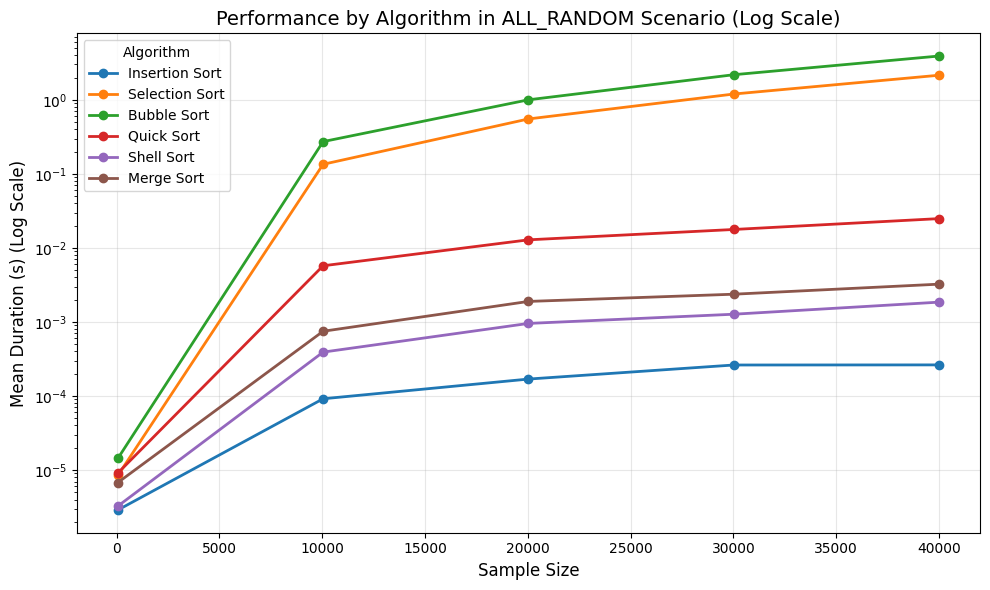

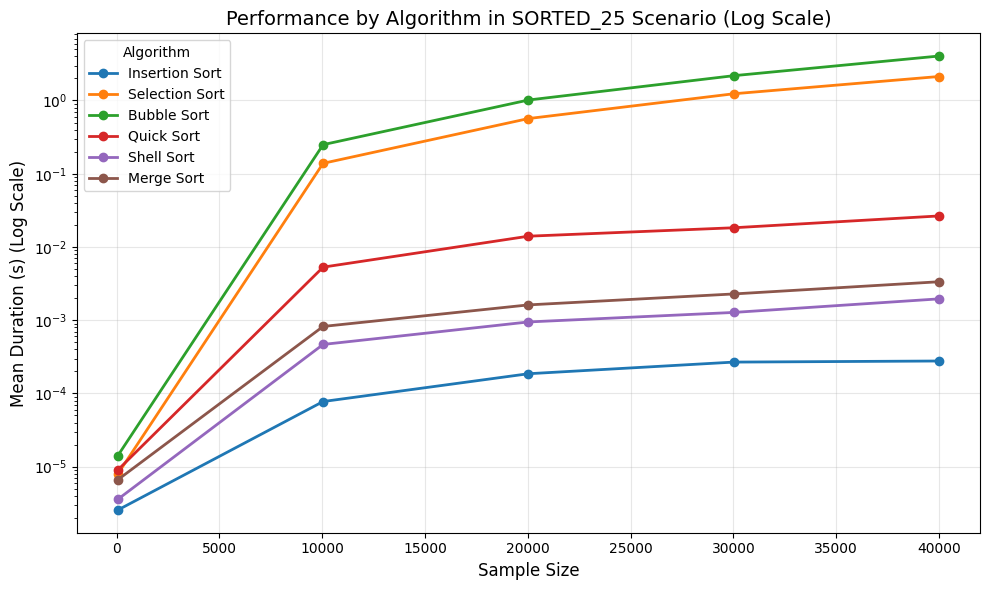

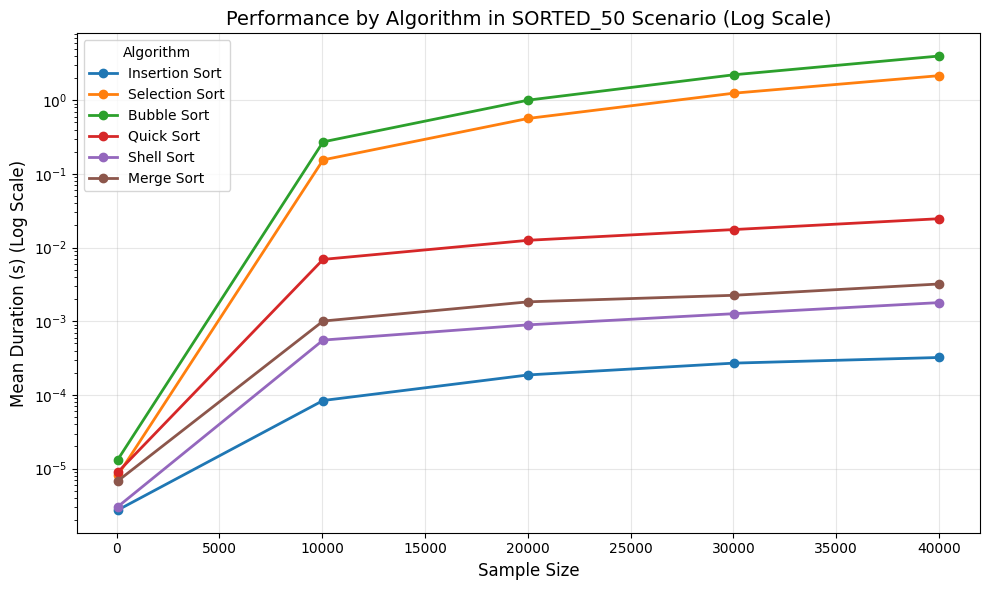

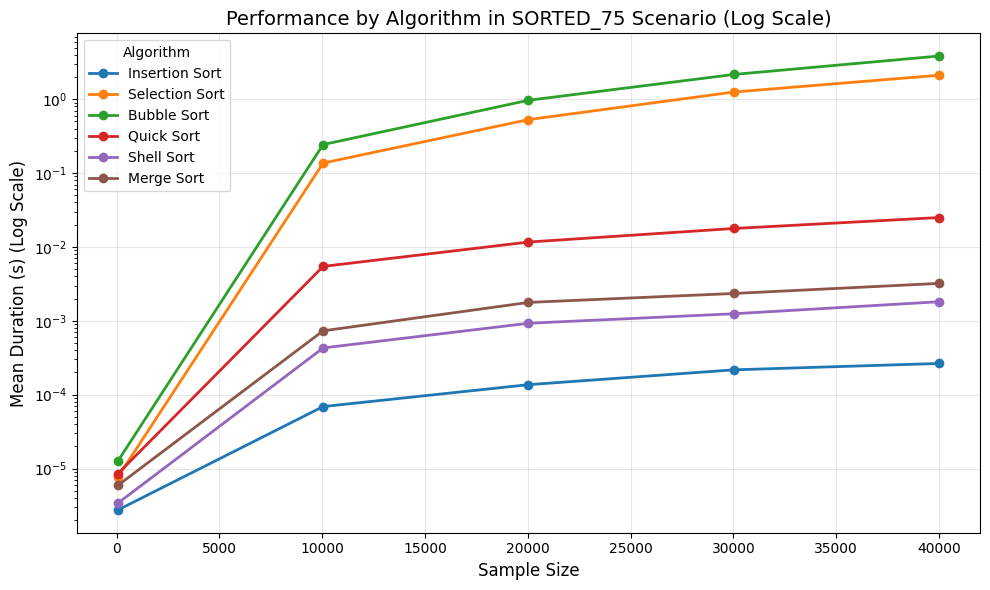

In [51]:
OFFSET = 1e-6

data["Adjusted Duration"] = data["Mean Duration (s)"] + OFFSET

for scenario in data['Scenario'].unique():
    scenario_data = data[data["Scenario"] == scenario]
    algorithms = scenario_data["Algorithm"].unique()

    plt.figure(figsize=(10, 6))
    
    for alg in algorithms:
        # Filtra os dados do algoritmo e ordena por tamanho da amostra
        alg_data = scenario_data[scenario_data["Algorithm"] == alg].sort_values("Sample Size")
        
        if not alg_data.empty:
            x = alg_data["Sample Size"]
            y = alg_data["Adjusted Duration"] 
            
            # Verifica se há mais de um ponto para traçar uma linha
            if len(x) > 1:
                plt.plot(
                    x,
                    y,
                    marker='o',
                    linestyle='-', 
                    linewidth=2,
                    label=alg
                )
            else:
                plt.scatter(
                    x,
                    y,
                    marker='o',
                    s=100,  
                    label=alg
                )

    plt.yscale('log') 
    plt.xlabel("Sample Size", fontsize=12)
    plt.ylabel("Mean Duration (s) (Log Scale)", fontsize=12)
    plt.title(f"Performance by Algorithm in {scenario} Scenario (Log Scale)", fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(title="Algorithm")
    plt.tight_layout()
    plt.show()